In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("./data/raw/dataset_191_wine.csv")

In [3]:
dataset.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   class                           178 non-null    int64  
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    int64  
 6   Total_phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178 non-null    float64
 12  OD280%2FOD315_of_diluted_wines  178 

In [5]:
for feature in dataset.loc[:, dataset.columns != 'class']:
    dataset[feature] = (dataset[feature] - dataset[feature].min()) / (dataset[feature].max() - dataset[feature].min())

In [6]:
one_hot_dataset = dataset.copy()
one_hot_dataset = one_hot_dataset.drop(['class'], axis=1)
classes = dataset['class'].values.tolist()
classes_1 = []
classes_2 = []
classes_3 = []
for i in classes:
    if i == 1:
        classes_1.append(1)
        classes_2.append(0)
        classes_3.append(0)
    elif i == 2:
        classes_1.append(0)
        classes_2.append(1)
        classes_3.append(0)
    else:
        classes_1.append(0)
        classes_2.append(0)
        classes_3.append(1)

one_hot_dataset["class_1"] = classes_1
one_hot_dataset["class_2"] = classes_2
one_hot_dataset["class_3"] = classes_3

In [7]:
one_hot_dataset.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline,class_1,class_2,class_3
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1,0,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1,0,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1,0,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1,0,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1,0,0


In [8]:
def manhattan(x, y):
    distance = 0
    for i in range(len(x)):
        distance += abs(x[i] - y[i])
    return distance

def euclidean(x, y):
    distance = 0
    for i in range(len(x)):
        distance += (x[i] - y[i]) ** 2
    return distance


def chebyshev(x, y):
    distance = 0
    for i in range(len(x)):
        distance = max(distance, abs(x[i] - y[i]))
    return distance

In [9]:
def support(u):
    return abs(u) >= 1


def uniform(u):
    if support(u):
        return 0
    return 0.5


def triangular(u):
    if support(u):
        return 0
    return 1 - abs(u)


def epanechnikov(u):
    if support(u):
        return 0
    return 3 / 4 * (1 - u**2)


def quartic(u):
    if support(u):
        return 0
    return 15 / 16 * (1 - u**2)**2

In [10]:
def calculate_F_score(confusion_matrix):
    k = len(confusion_matrix)
    truePositive = [0] * k
    falsePositive = [0] * k
    falseNegative = [0] * k
    countClasses = [0] * k
    recall = [0.0] * k
    precision = [0.0] * k
    fScore = [0.0] * k
    totalSum = 0
    fScoreSum = 0


    for i in range(k):
        for j in range(k):
            totalSum += confusion_matrix[i][j]
            countClasses[i] += confusion_matrix[i][j]


    for i in range(k):
        for j in range(k):
            if i == j:
                truePositive[i] = confusion_matrix[i][j]
            else:
                falsePositive[i] += confusion_matrix[i][j]
                falseNegative[i] += confusion_matrix[j][i]

        recall[i] = 0 if (truePositive[i] + falseNegative[i]) == 0  else float(truePositive[i]) / (truePositive[i] + falseNegative[i])
        precision[i] = 0 if (truePositive[i] + falsePositive[i]) == 0 else float(truePositive[i]) / (truePositive[i] + falsePositive[i])
        fScore[i] = 0 if (precision[i] + recall[i]) == 0 else 2 * ((precision[i] * recall[i]) / (precision[i] + recall[i]))

        fScoreSum += fScore[i] * countClasses[i]

    fScoreSum /= totalSum
    averageFScore = fScoreSum

    return averageFScore

In [11]:
def nadaray_watson(x, y, h, u, kernel_function, distance_function):
    if h != 0:
        numerator = 0
        denominator = 0
        for i in range(len(x)):
            denominator += kernel_function(distance_function(x[i], u) / h)
        if denominator != 0:
            for i in range(len(x)):
                numerator += y[i] * kernel_function(distance_function(x[i], u) / h)
            return numerator / denominator
        else:
            sum = 0
            for i in range(len(x)):
                sum += y[i]
            return sum / len(x)
    else:
        sum = 0
        for i in range(len(x)):
            sum += y[i]
        return sum / len(x)

In [20]:
def regression(data, targets, distance_function, kernel_function, window_type, window_width, need_log=True):
    confusion_matrix = [[0 for j in range(3)] for i in range(3)]  # 3 - кол-во классов

    for i in range(len(data)):
        data_train = data.copy()
        data_test = data_train.pop(i)
        predictions = []

        for j in range(len(targets)):
            target_train = targets[j].copy()
            target_train.pop(i)

            data_target_zip = zip(data_train, target_train)
            xs = sorted(data_target_zip, key=lambda row: distance_function(row[0][0:len(row) - 1], data_test))

            data_train = [x[0] for x in xs]
            target_train = [x[1] for x in xs]

            prediction = nadaray_watson(data_train, target_train, window_width, data_test, kernel_function, distance_function)
            predictions.append(prediction)

        reals = []
        for k in range(len(targets)):
            reals.append(targets[k][i])
        real = reals
        real = real.index(max(real)) + 1
        prediction = predictions.index(max(predictions)) + 1
        confusion_matrix[prediction - 1][real - 1] += 1

    F_score = calculate_F_score(confusion_matrix)
    if need_log:
        print("----------")
        print("Distance: " + str(distance_function.__name__))
        print("Kernel: " + str(kernel_function.__name__))
        print("Window Type: " + window_type)
        print("Window Width: " + str(window_width))
        print("F score: " + str(F_score))
    return F_score


In [15]:
def leave_one_out(data, targets):
    distance_functions = [manhattan, euclidean, chebyshev]
    kernel_functions = [uniform, triangular, epanechnikov, quartic]
    window_types = ["fixed", "variable"]
    max_F_score = 0
    best_distance_function = None
    best_kernel_function = None
    best_window_type = None
    best_window_width = None
    for distance_function in distance_functions:
        for kernel_function in kernel_functions:
            for window_type in window_types:
                if window_type == "variable":
                    windows = [i for i in range(1, 30)]
                else:
                    windows = [i for i in range(1, 30)]
                for window in windows:
                    F_score = regression(data, targets, distance_function, kernel_function, window_type, window)
                    if F_score >= max_F_score:
                        max_F_score = F_score
                        best_distance_function = distance_function
                        best_kernel_function = kernel_function
                        best_window_type = window_type
                        best_window_width = window
    return best_distance_function, best_kernel_function, best_window_type, best_window_width, max_F_score

In [17]:
data = one_hot_dataset.drop(["class_1", "class_2", "class_3"], axis=1)
data = data.values.tolist()
target1 = one_hot_dataset["class_1"].values.tolist()
target2 = one_hot_dataset["class_2"].values.tolist()
target3 = one_hot_dataset["class_3"].values.tolist()
targets = [target1, target2, target3]
print(leave_one_out(data, targets))

----------
Distance: manhattan
Kernel: uniform
Window Type: fixed
Window Width: 0.1
F score: 0.570281124497992
----------
Distance: manhattan
Kernel: uniform
Window Type: fixed
Window Width: 0.2
F score: 0.570281124497992
----------
Distance: manhattan
Kernel: uniform
Window Type: fixed
Window Width: 0.30000000000000004
F score: 0.570281124497992
----------
Distance: manhattan
Kernel: uniform
Window Type: fixed
Window Width: 0.4
F score: 0.570281124497992
----------
Distance: manhattan
Kernel: uniform
Window Type: fixed
Window Width: 0.5
F score: 0.570281124497992
----------
Distance: manhattan
Kernel: uniform
Window Type: fixed
Window Width: 0.6000000000000001
F score: 0.570281124497992
----------
Distance: manhattan
Kernel: uniform
Window Type: fixed
Window Width: 0.7000000000000001
F score: 0.5563591728826361
----------
Distance: manhattan
Kernel: uniform
Window Type: fixed
Window Width: 0.8
F score: 0.5672693821718068
----------
Distance: manhattan
Kernel: uniform
Window Type: fixe

In [21]:
F_Scores = []
for h in range(1, 100):
    F_Scores.append((h, regression(data, targets, chebyshev, quartic, "fixed", h, False)))
print(F_Scores)

[(1, 0.7425192193968065), (2, 0.570281124497992), (3, 0.570281124497992), (4, 0.570281124497992), (5, 0.570281124497992), (6, 0.570281124497992), (7, 0.570281124497992), (8, 0.570281124497992), (9, 0.570281124497992), (10, 0.570281124497992), (11, 0.570281124497992), (12, 0.570281124497992), (13, 0.570281124497992), (14, 0.570281124497992), (15, 0.570281124497992), (16, 0.570281124497992), (17, 0.570281124497992), (18, 0.570281124497992), (19, 0.570281124497992), (20, 0.570281124497992), (21, 0.570281124497992), (22, 0.570281124497992), (23, 0.570281124497992), (24, 0.570281124497992), (25, 0.570281124497992), (26, 0.570281124497992), (27, 0.570281124497992), (28, 0.570281124497992), (29, 0.570281124497992), (30, 0.570281124497992), (31, 0.570281124497992), (32, 0.570281124497992), (33, 0.570281124497992), (34, 0.570281124497992), (35, 0.570281124497992), (36, 0.570281124497992), (37, 0.570281124497992), (38, 0.570281124497992), (39, 0.570281124497992), (40, 0.570281124497992), (41, 0.

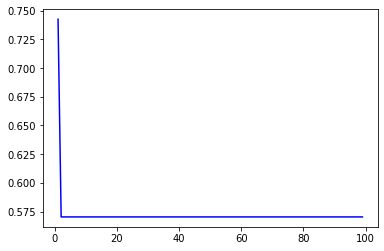

In [23]:
import matplotlib.pyplot as plt

x = [x[0] for x in F_Scores]
y = [x[1] for x in F_Scores]

plt.plot(x, y, 'b')
plt.show()